---
title: "Line Linking Program Demo"
author: "Ryan E Lima"
email: Ryan.Lima@nau.edu
format: html
license: "CC BY 4.0"
---



## Line Linking Tutorial 
---
> © 2025 Ryan E Lima — This work is licensed under a [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/).
---
### Background:

This workflow is part of a larger workflow to delineate lineaments from DEM datasets. This portion of the workflow focuses on linking line segments together. These line segments would probably be the output of a edge detection algorithm and the use of cv2.contours to extract the line segements from an image and turn them into a shapefile of lines. Often times lineaments are discontinuous or hidden for short stretches and this aims to link together lines that are close to eachother and collinear. This is a common problem in geology and geophysics where lineaments are often discontinuous due to noise in the data or other factors. This workflow will use the `shapely` library to link line segments together based on their proximity and orientation.

For this demo we are merging vector line features based on:
- proximity (distance)
- orientation (angle)
- collinearity (a measure of directional alignment between two lines)
    > This approach effectively tests whether line2 continues in the direction of line1 — and avoids mistaking parallel or offset lines as continuations.


### Requirements:
- `shapely` - for geometric operations and manipulation of line segments
- `geopandas` - for handling geospatial data and shapefiles
- `matplotlib` - for plotting the results
- `math` - for mathematical operations
- `logging` - for logging messages and errors


### How the greedy local merging algorithm works:

1. first a shapefile or list of LineStrings is imported and covert to a `geopandas` gdf object.
2. Next you it flattens multilines Converts MultiLineStrings into separate LineStrings, and assigns a 'parent_id' to track origin.
3. Then thresholds are set for `search distance`, `angle threshold`, and `collinearity threshold`.
    `search distance` is the maximum distance between two line segments to be considered for linking.
    `angle threshold` is the maximum angle difference between two line segments to be considered for linking.
    `collinearity threshold` is a score, it is calculated by calculating the distance between the end points of two lines (Line1 and Line2), then extending Line1 by the distance between the two points and measures how close the end of the projected Line1 is to the start of Line2. The closer the end of the projected Line1 is to the start of Line2, the lower the collinearity score. The collinearity score is then compared to the `collinearity threshold` to determine if the two lines are collinear.
    **default values** for the demo are: `search_dist=5, angle_thresh=20,collinearity_thresh=1` since the synthetic lines in the demo only span 20 units in the x and y directions we set the search distance at 5 units and the collinearity threshold at 1 unit. These numbers would be much larger for real world data projected in meters, feet, km or miles.
4. The algorithm iterates through each line segment and checks for potential connections with other line segments within the search distance. Starting with the closes line verticies then It calculates the angle difference and collinearity score for each pair of line segments and if they are within the specified range a bridge is created using the straightest between the two end points.







In [ ]:
# import LineConnectChecks which uses the functions from LineConnect.py and runs a demo workflow using synthetic lines
from LineConnectChecks import * #import LineConnectChecks which imports functions from LineConnect.py 

LineConnectChecks.py has been imported, try to run: run_LinCon_demo()


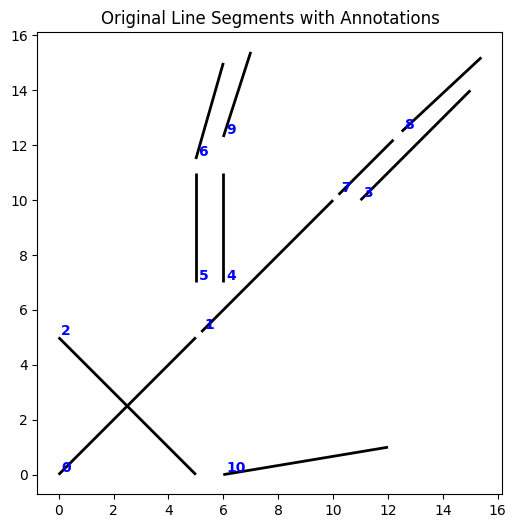

5 merges were completed


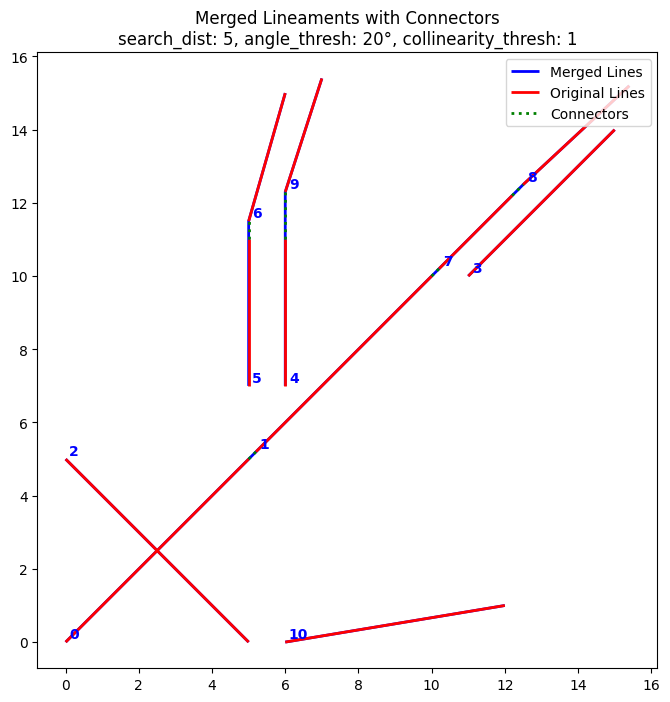


--- Lineament Merge Report ---
Original GeoDataFrame:
 - CRS: None
 - Feature count: 11
New GeoDataFrame:
 - CRS: None
 - Feature count: 6
Parameters used:
 - Search distance: 5 units
 - Angle threshold: 20 degrees
 - Collinearity threshold: 1 units
-------------------------------



In [ ]:
run_LinCon_demo()

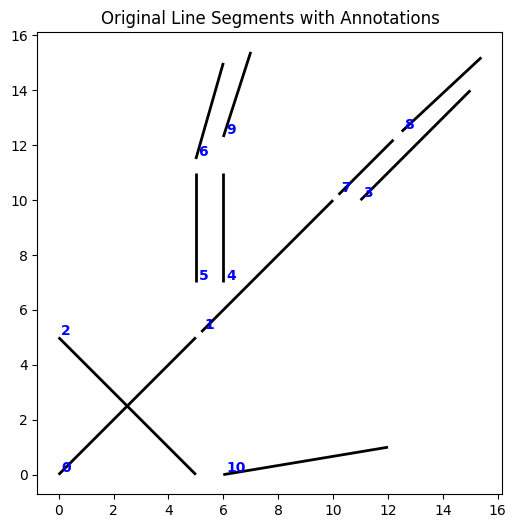

4 merges were completed


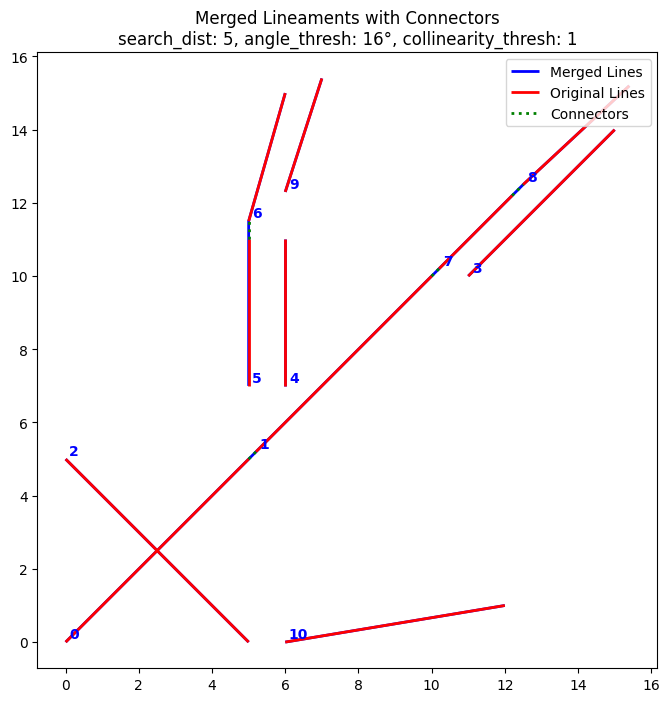


--- Lineament Merge Report ---
Original GeoDataFrame:
 - CRS: None
 - Feature count: 11
New GeoDataFrame:
 - CRS: None
 - Feature count: 7
Parameters used:
 - Search distance: 5 units
 - Angle threshold: 16 degrees
 - Collinearity threshold: 1 units
-------------------------------



In [4]:
# now lets try reducing the angle tolerance to 16 degrees
run_LinCon_demo(angle_thresh=16)

Notice that we lose the connection between line 4 and line 9, because they are about 18 degrees different. 

## Keywords

Computational geometry, Pattern recognition, GIS feature generalization, Lineament analysis, Geospatial data processing, Line linking, Line generalization, Geometric algorithms, Spatial analysis, greedy agglomerative clustering, iterative feature merging, local search merging.

## Related Concepts

[Ramer–Douglas–Peucker algorithm](https://en.wikipedia.org/wiki/Ramer%E2%80%93Douglas%E2%80%93Peucker_algorithm)

## References 

Sibson, R. (1973)
SLINK: An optimally efficient algorithm for the single-link cluster method. [https://doi.org/10.1093/comjnl/16.1.30](https://doi.org/10.1093/comjnl/16.1.30)

